### matplotlib 차트 유형

1. histogram : 연속형값의 도수(빈도수/개수) 파악
2. bar plot : 범주형값의 개수, 또는 다른 연속값을 파악
3. scatter plot: 산포도(산점도) 두 연속값들의 분포 파악
4. line plot: 시계열데이터(연속값) 변화 파악
5. box plot: 연속형 값의 사분위, 이상치 파악
6. pie chart: 전체 범위 중의 비율

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mp
import numpy as np
import pandas as pd

mp.rc('font',family='AppleGothic')
plt.rcParams['axes.unicode_minus']

True

##### Histogram
- 연속형 값을 일정 구간을 나누어 구간별 데이터 포인트의 빈도를 시각화
    - x축 : 연속형 데이터
    - y축 : 구간별 데이터포인트의 개수 (합)   

In [3]:
scores = [100, 95, 97, 98, 99, 90, 80, 81, 84, 88, 70, 78, 79, 70, 65, 66, 61, 64, 100, 89]

bins = [60, 70, 80, 90, 100]

In [11]:
# 암호화폐 일일 수익률
df = pd.read_csv('./data/crypto_daily_returns.csv')
df

,Date,BTC,ETH,LTC
0,9/17/2014,0.000000,0.000000,0.000000
1,9/18/2014,-7.192558,NaN,-7.379983
2,9/19/2014,-6.984264,NaN,-7.629499
3,9/20/2014,3.573492,NaN,-0.955003
4,9/21/2014,-2.465854,NaN,-0.945300
...,...,...,...,...
2380,3/28/2021,-0.040672,-1.464535,0.107149
2381,3/29/2021,3.216138,7.587343,5.105316
2382,3/30/2021,2.021625,1.447984,1.135017
2383,3/31/2021,0.001936,3.918042,0.415392


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2385 non-null   object 
 1   BTC     2385 non-null   float64
 2   ETH     2061 non-null   float64
 3   LTC     2385 non-null   float64
dtypes: float64(3), object(1)
memory usage: 74.7+ KB


In [13]:
df.describe()

,BTC,ETH,LTC
count,2385.000000,2061.000000,2385.000000
mean,0.280359,0.538739,0.315764
std,3.887338,6.471972,5.783455
min,-37.169539,-72.824950,-40.224814
25%,-1.209796,-2.257161,-1.922825
50%,0.203326,0.043409,-0.022066
75%,1.804233,2.912284,2.078286
max,25.247169,50.732307,66.765321


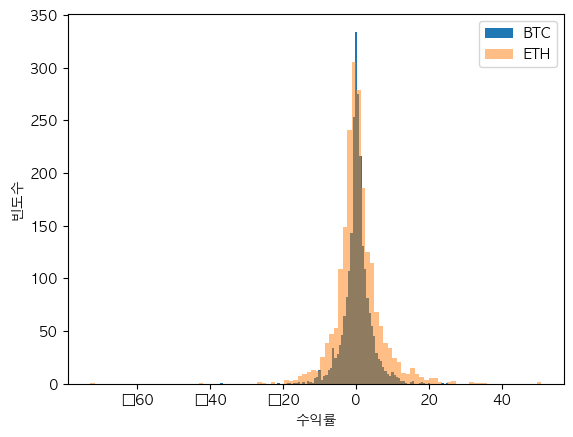

In [33]:
plt.hist(df['BTC'],bins=100,label='BTC')
plt.hist(df['ETH'],bins=100,label='ETH',alpha=.5)
plt.legend()

plt.xlabel('수익률')
plt.ylabel('빈도수')
plt.show()

##### Bar plot
- 막대 차트
- 범주형 데이터와 연속형 데이터(막대의 길이)의 관계를 시각화
    - x축 : 범주형 데이터 카테고리
    - y축 : 연속형 데이터 (총합,평균)

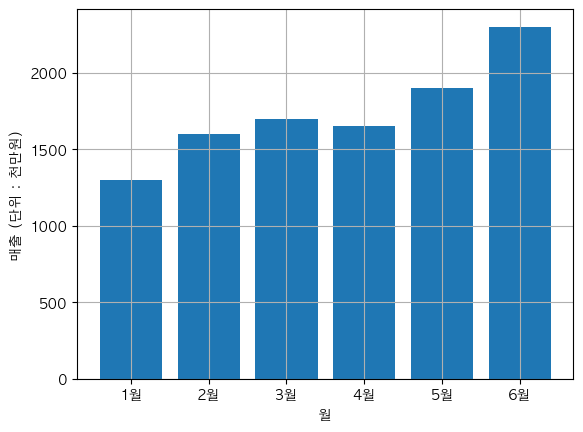

In [18]:
# 월별 매출 데이터

df = pd.DataFrame({
    'months':['1월','2월','3월','4월','5월','6월'],
    'sales':[1300,1600,1700,1650,1900,2300]
})

for i,val in enumerate(df['sales']):
    # x축 위치, y축 위치,텍스트,텍스트 정렬(위치)
    plt.text(i,val +100,str(val),ha='center')

# zorder : z 축 깊이 설정 (값이 클수록 앞으로 나옴)
plt.bar(df['months'],df['sales'])
plt.xlabel('월')
plt.ylabel('매출 (단위 : 천만원)')
plt.grid(zorder=1)
plt.show()

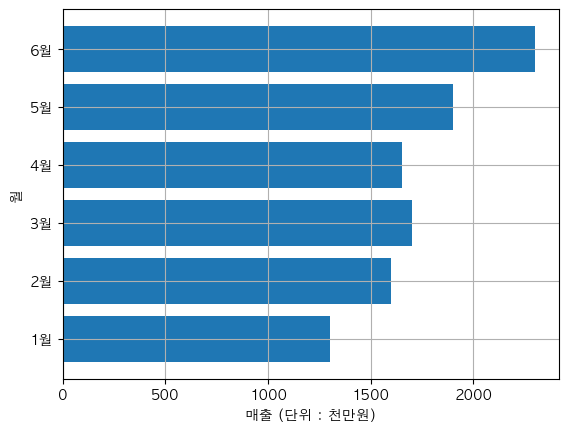

In [21]:
# 월별 매출 데이터

df = pd.DataFrame({
    'months':['1월','2월','3월','4월','5월','6월'],
    'sales':[1300,1600,1700,1650,1900,2300]
})


plt.barh(df['months'],df['sales'])
plt.ylabel('월')
plt.xlabel('매출 (단위 : 천만원)')
plt.grid(zorder=1)
plt.show()

In [25]:
beers_df = pd.read_csv('./data/beers.csv')
beers_df

,beer_name,beer_type,country
0,Heineken,Pale Lager,Netherlands
1,Guinness,Stout,Ireland
2,Corona Extra,Pale Lager,Mexico
3,Stella Artois,Pilsner,Belgium
4,Budweiser,Pale Lager,USA
5,Hoegaarden,Witbier,Belgium
6,Carlsberg,Pale Lager,Denmark
7,Sapporo,Lager,Japan
8,Asahi,Lager,Japan
9,Becks,Pilsner,Germany


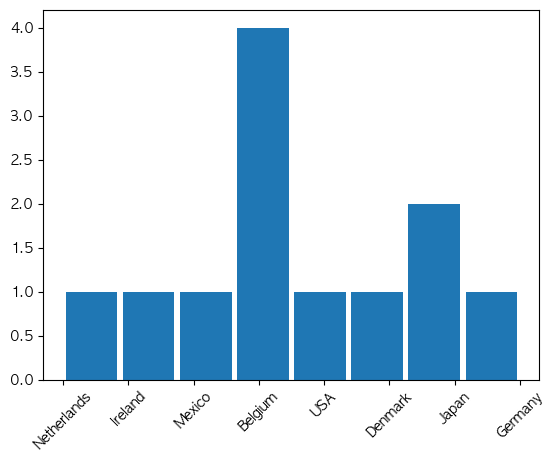

In [29]:
beer_df_groupby = beers_df.groupby('country')['beer_name'].count()
# print(beer_df_groupby)
plt.hist(beers_df['country'],bins=beers_df['country'].nunique(),rwidth=0.9)
plt.xticks(rotation=45)

plt.show()

##### Line plot
- 시계열 데이터에서 변화하는 값의 추이를 시각화
    - x축 : 연속형 데이터
    - y축 : 연속형 데이터

In [31]:
df = pd.DataFrame({
    'Date':pd.date_range(start='2025-01-01',periods=14,freq='D'),
    'APPL':np.random.randint(100,150,14),
    'MSFT':np.random.randint(100,150,14),
})

df

,Date,APPL,MSFT
0,2025-01-01,133,141
1,2025-01-02,142,126
2,2025-01-03,136,140
3,2025-01-04,102,131
4,2025-01-05,100,138
5,2025-01-06,140,148
6,2025-01-07,121,125
7,2025-01-08,107,117
8,2025-01-09,134,126
9,2025-01-10,137,126


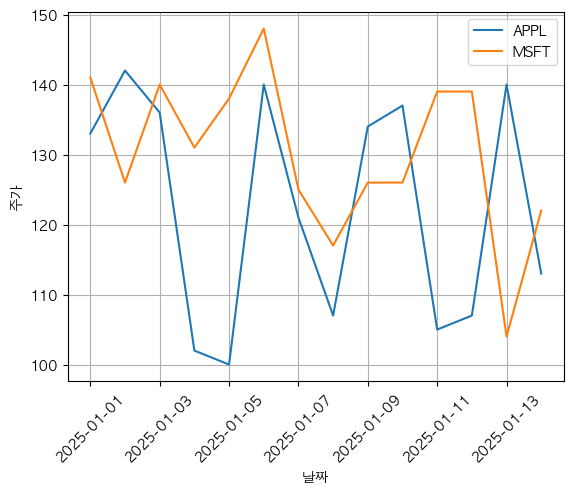

In [34]:
plt.plot(df['Date'],df['APPL'],label='APPL')
plt.plot(df['Date'],df['MSFT'],label='MSFT')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('날짜')
plt.ylabel('주가')
plt.grid(zorder=1)
plt.show()


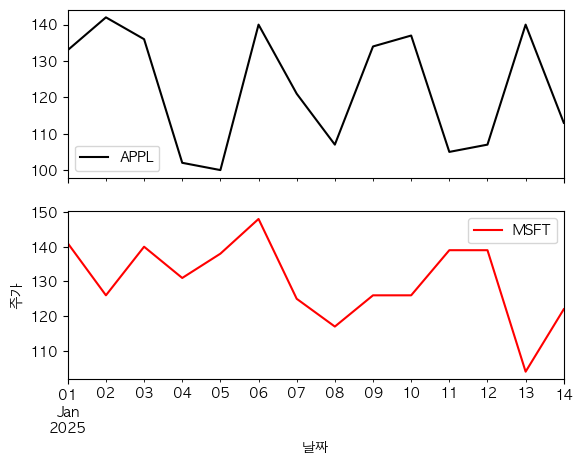

In [37]:
df.plot(x='Date',y=['APPL','MSFT'],color=['black','red'],subplots=True)
plt.xlabel('날짜')
plt.ylabel('주가')
plt.show()

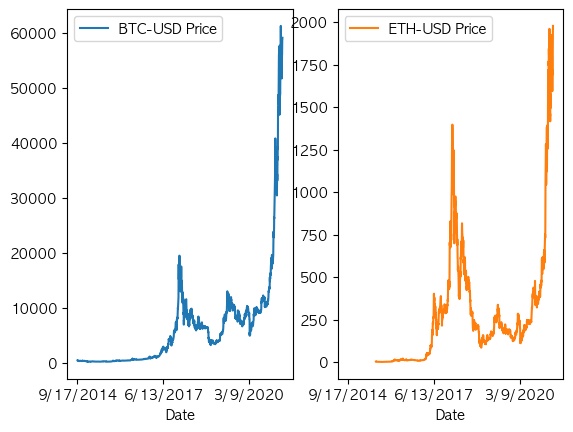

In [40]:
crypto_df = pd.read_csv('./data/crypto_daily_prices.csv')
crypto_df
crypto_df.plot(x='Date',y=['BTC-USD Price','ETH-USD Price'],subplots=True,layout=(1,2))

plt.show()


##### scatter plot
- 두 축의 변수 관계를 시각화
- 두 변수 간 상관관계, 클러스터링, 이상치 파악에 도움

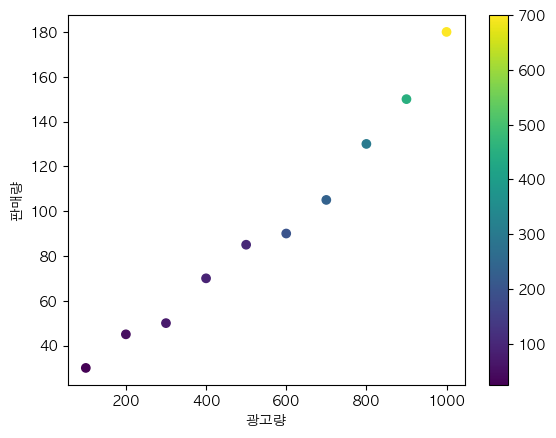

In [5]:
df = pd.DataFrame({
    'ad_budget': np.arange(100, 1001, 100), 
    'sales': [30, 45, 50, 70, 85, 90, 105, 130, 150, 180],
    'visitor': [100, 140, 200, 210, 260, 290, 300, 350, 440, 600],
    'colors': [25, 50, 70, 90, 100, 200, 235, 300, 450, 700]
})

plt.scatter(df['ad_budget'],df['sales'],c=df['colors'],cmap='viridis')
plt.colorbar()
plt.xlabel('광고량')
plt.ylabel('판매량')
plt.show()



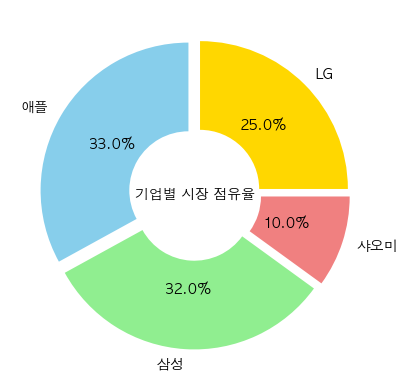

In [14]:
df = pd.DataFrame({
    'label': ['애플', '삼성', '샤오미', 'LG'],
    'market_share': [33, 32, 10, 25], 
    'sales': [1345, 234, 545, 454],
    'explode': [0, 0.1, 0, 0]
})

plt.pie(
    df['market_share'],
    labels=df['label'],
    autopct='%.1f%%',
    startangle=90,
    explode=[.05,.05,.05,.05],
    colors=['skyblue','lightgreen','lightcoral','gold'],
    wedgeprops={'width':.6},
)

plt.text(0,0,'기업별 시장 점유율',ha='center',va='center')
plt.show()

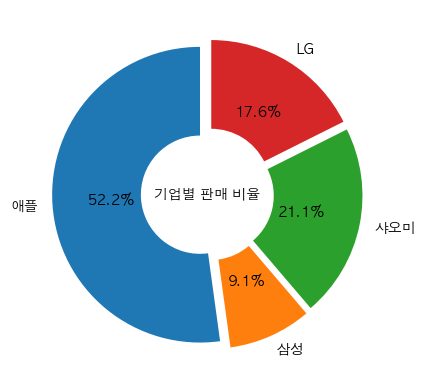

In [17]:
plt.pie(
    df['sales'],
    labels=df['label'],
    autopct='%.1f%%',
    startangle=90,
    explode=[.05,.05,.05,.05],
    wedgeprops={'width':.6},
)

plt.text(0,0,'기업별 판매 비율',ha='center',va='center')
plt.show()

##### Box Plot
- 연속형 데이터의 분포를 사분위수로 시각화
- 이상치 outlier를 도출하는 데에 효과적
    - x축 : 이산값(범주형) 데이터
    - y축 : 연속형 데이터

- 표현되는 값들
    - max ,Q3,Q2,Q1, min :최댓값,3분위수(75%),2분위수 (50%,중위값),1분위수 (25%), 최소값
    - IQR (Inter-Quartile Range) : 사분 범위

In [18]:
# 반별 시험 성적 데이터 (2차원 배열)
class_scores = [
    [85, 88, 90, 92, 93, 87, 95, 91, 84, 86],  # Class A
    [78, 82, 85, 80, 79, 84, 81, 83, 77, 76],  # Class B
    [92, 95, 96, 94, 90, 97, 93, 91, 98, 99],  # Class C
    [70, 72, 68, 75, 74, 69, 73, 71, 66, 67]   # Class D
]

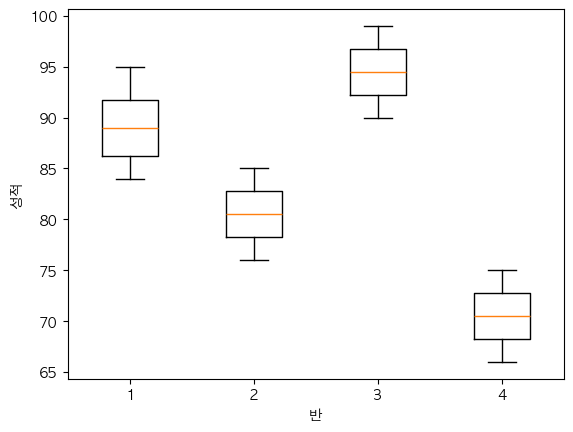

In [19]:
plt.boxplot(class_scores)
plt.xlabel('반')
plt.ylabel('성적')
plt.show()


In [20]:
data = class_scores[0]
print('최소값:',np.min(data))
print('사분위수 (Q1):',np.percentile(data,25))
print('사분위수 (Q2):',np.percentile(data,50))
print('사분위수 (Q3):',np.percentile(data,75))
print('최대값:',np.max(data))




최소값: 84
사분위수 (Q1): 86.25
사분위수 (Q2): 89.0
사분위수 (Q3): 91.75
최대값: 95


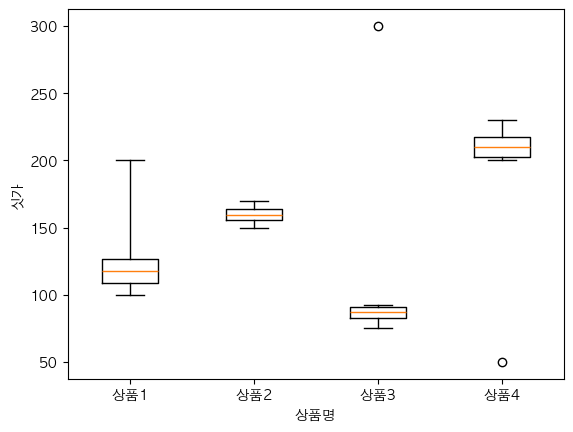

In [ ]:
weird_data = [
    [100, 120, 130, 110, 115, 105, 125,200],   
    [150, 160, 170, 155, 165, 158],
    [80, 85, 90, 75, 92, 87,300],   
    [200, 220, 210, 205, 215, 230,50]    
]


# whis 기본값 : 1.5
# [참고] 수염의 길이 계산 공식 : [Q1 - whis * IQR, Q3 +whis * IQR]
# [참고] IQR = Q3 - Q1
plt.boxplot(weird_data,whis=5)
plt.xticks([1,2,3,4],['상품1','상품2','상품3','상품4'])
plt.xlabel('상품명')
plt.ylabel('싯가')
plt.show()


